In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

### Carga dos dados

In [2]:
# Abrir o dataset
df_pontuacao = pd.read_csv('./datasets/test_score.csv')

In [3]:
# Checar estrutura do Dataset
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [4]:
# Visualizar Topo do DF
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


In [5]:
# Visualizar final do dataset
df_pontuacao.tail(10)

,horas_estudo,pontuacao_teste
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


### EDA

In [6]:
# Medidas estatísticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

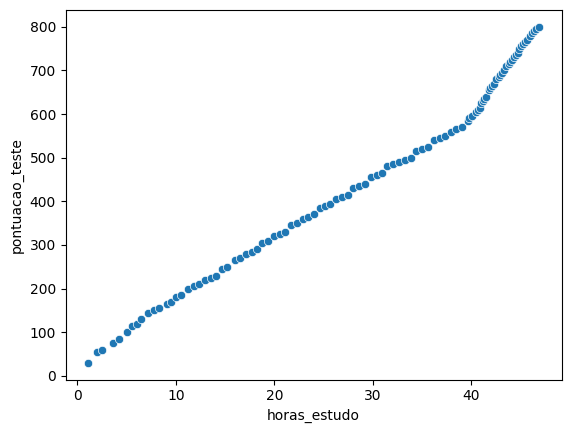

In [7]:
# Plot de Dispersão
# X = horas_estudo
# Y = pontuacao_teste
sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

<Axes: ylabel='horas_estudo'>

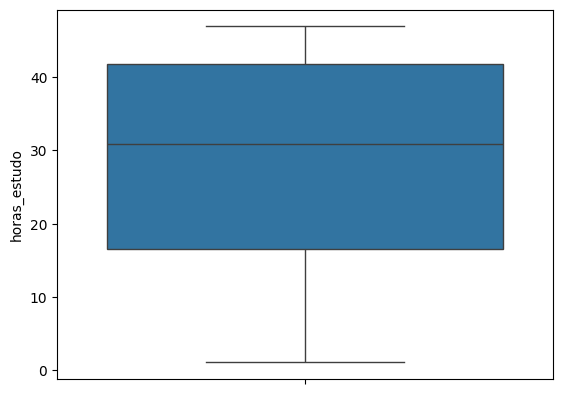

In [8]:
# Verificar se temos outliers
# Plot BoxPlot
sns.boxplot(df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

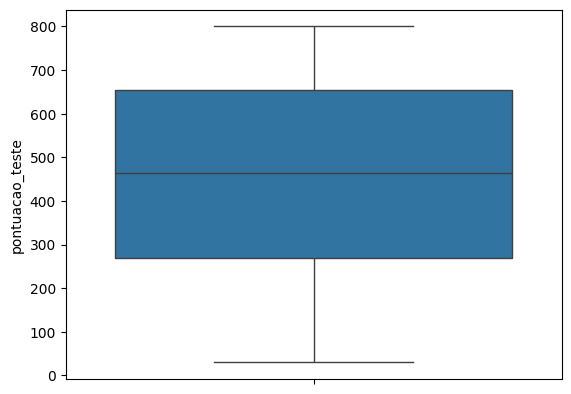

In [9]:
# Verificar se temos outliers
# Plot BoxPlot
sns.boxplot(df_pontuacao, y='pontuacao_teste')

<Axes: >

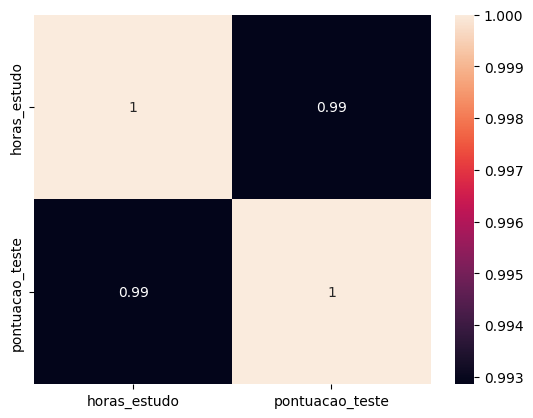

In [10]:
# Verificar Correlação - Pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

<Axes: >

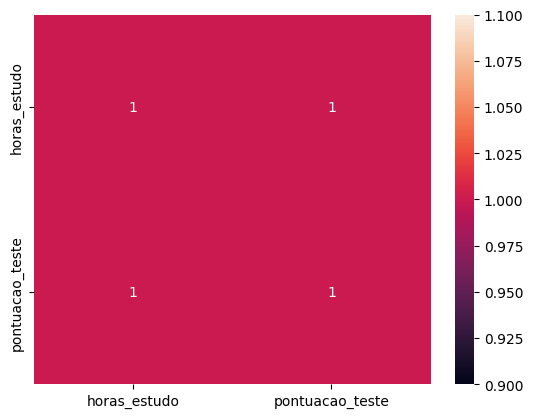

In [11]:
# Verificar Correlação - Spearman
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

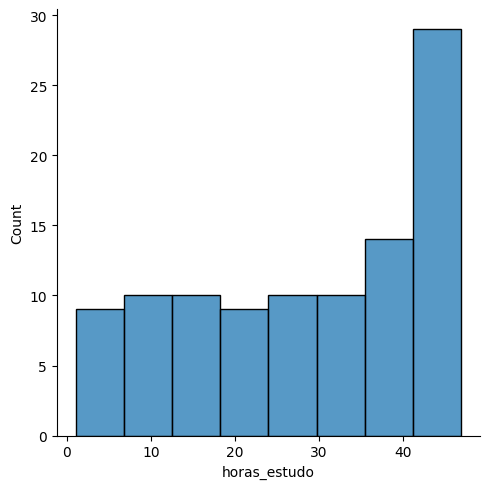

In [12]:
# Histograma das variáveis
sns.displot(df_pontuacao, x='horas_estudo')

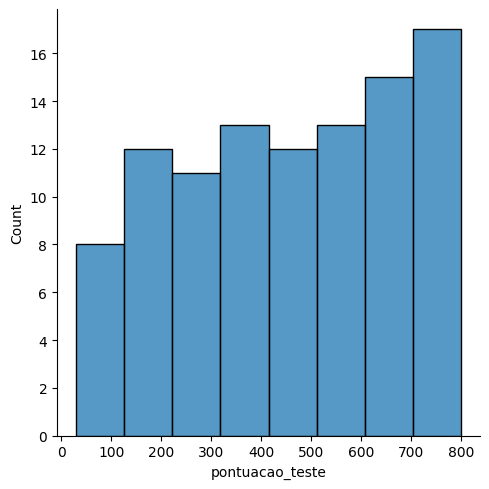

In [13]:
# Histograma das variáveis
sns.displot(df_pontuacao, x='pontuacao_teste')

### Treinar Modelo

In [14]:
# Dividir dataset entre treino e teste
# Quando temos apenas uma feature, precisamos ajustar o shape
X = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [16]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [17]:
# Treinar o modelo
reg_model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Imprimir a equação da reta
# y = aX + b
print("A equação da reta é y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é y = 15.642619x + 8.476601


### Validar Modelo - Métricas

In [19]:
# Predição dos valores com base no conjunto de testes
y_pred = reg_model.predict(X_test)

In [20]:
# Calcular métrica R-Squared ou Coeficiente de Determinação
# R2 representa a proporção na variação na variável dependente que é explicada pela variável independente
from sklearn.metrics import r2_score, root_mean_squared_error, mean_squared_error

In [21]:
r2_score(y_test, y_pred)

0.9828400452912442

In [22]:
# Calcular métrica MAE (Mean Absolute Error)
# MAE = Média (y_test - y_pred)
# É uma métrica fácil de interpretar
# MAE é menos sensível a outliers
root_mean_squared_error(y_test, y_pred)

np.float64(27.69471608884342)

In [23]:
# Calcular métrica MSE (Mean Squared Error)
# MSE = Média (y_test - y_pred)^2
# Não é uma métrica fácil de interpretar
# MSE é mais sensível a outliers e penaliza grandes erros
mean_squared_error(y_test, y_pred)

np.float64(766.9972992416427)

In [24]:
# Calcular métrica RMSE (Squared Root Mean Squared Error)
# RMSE = Raiz (Média (y_test - y_pred)^2)
# É uma métrica fácil de interpretar
# RMSE é mais sensível a outliers e penaliza grandes erros
root_mean_squared_error(y_test, y_pred)

np.float64(27.69471608884342)

In [25]:
# Análise Gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

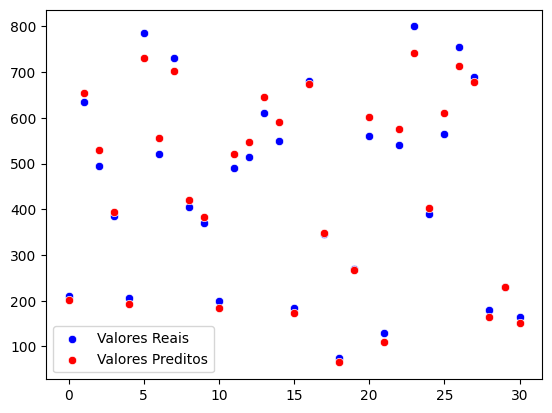

In [26]:
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores Preditos')
plt.legend()
plt.show()

### Análise de Resíduos

In [27]:
#  Calcular resíduos
residuos = y_test - y_pred

In [28]:
# Calcular os resíduos padronizados (standardization)
# Para cada elemento de um conjunto (X - média) / desvio_padrão
from scipy.stats import zscore

In [29]:
residuos_std = zscore(residuos)

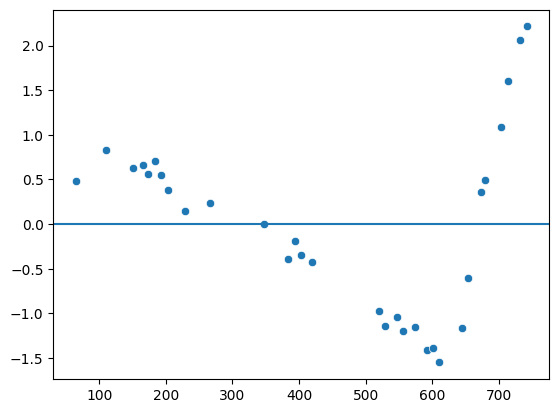

In [30]:
# Verificar linearidade do modelo:
# Se os resíduos estiver entre -2 e +2 (na escala padrão) - indica linearidade

# Verificar homogeneidade das variâncias (Homocedasticidade)
# Valores estiver em torno da reta, temos homocedasticidade, caso contrário
# se tiversmos alguma tendência ou padrão (formam um cone, funil), há heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

In [31]:
# Checar se resíduos seguem uma distribuição normal
# QQ (Quantile-Quantile) Plot, que avalia se uma amostra segue uma distribuição normal
import pingouin as pg

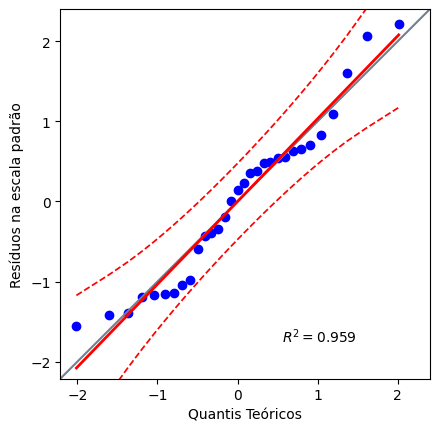

In [32]:
pg.qqplot(residuos_std, dist='norm', confidence=0.959)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [33]:
# Teste de Normalidade - Shapiro Wilk
# H0 - Segue distribuição normal
# H1 - Não segue distribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrário rejeitamos
stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print("Estatística do teste: {} e P-valor: {}".format(stat_shapiro, p_valor_shapiro))

Estatística do teste: 0.9500532226161759 e P-valor: 0.15663817850304967


In [34]:
# Teste de Normalidade - Kolmogorov-Smirnov
# H0 - Segue distribuição normal
# H1 - Não segue distribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrário rejeitamos
stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print("Estatística do teste: {} e P-valor: {}".format(stat_ks, p_valor_ks))

Estatística do teste: 0.48355808450512827 e P-valor: 3.395368995814077e-07


### Fazer predições com o modelo

In [35]:
# Se eu estudar 30.4 horas, qual a pontuação prevista pelo modelo?
reg_model.predict([[30.4]])

array([[484.01220436]])

In [36]:
# Quantas horas estudar para obter 600 pontos (pelo modelo)
# y = ax + b
# y - b = ax
# (y - b) / a = x
# x = (y - b) / a
(600 - reg_model.intercept_[0]) / reg_model.coef_[0][0]

np.float64(37.81485802710669)

### Salvar modelo para usar depois

In [37]:
import joblib

In [38]:
joblib.dump(reg_model, './model.pkl')

['./model.pkl']